## Sentiment Analysis

### Plan
- Cleaning and Preparing the Text
- Tokenization
- Choose a Sentiment Analysis Strategy, lexicon aggregation or premade machine learning model
- 

In [3]:
from CDS303functions import make_df
from CDS303functions import preprocess_and_tokenize

In [4]:
# Applying it to df_phish Email Text
df_phish = make_df()

df_phish['Tokenized_Text'] = df_phish['Email Text'].apply(preprocess_and_tokenize)

### Wordcloud to see the results of tokenization and letimization

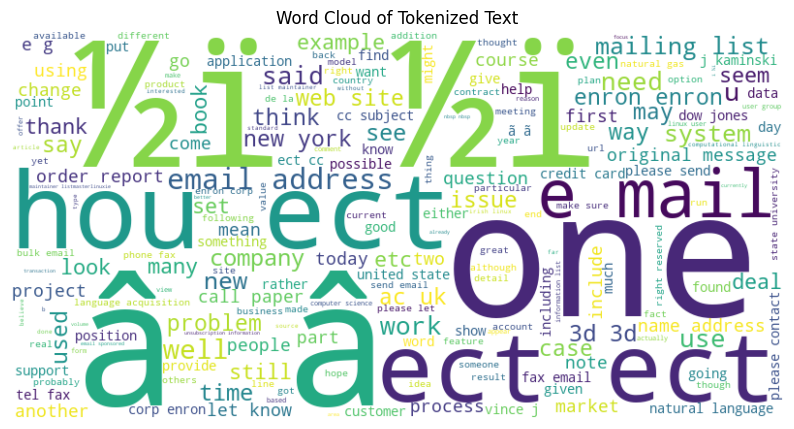

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all tokenized text into a single string
all_text = ' '.join(df_phish['Tokenized_Text'].explode().dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Tokenized Text')
plt.axis('off')
plt.show()

### Wordcloud Phishing versus Safe

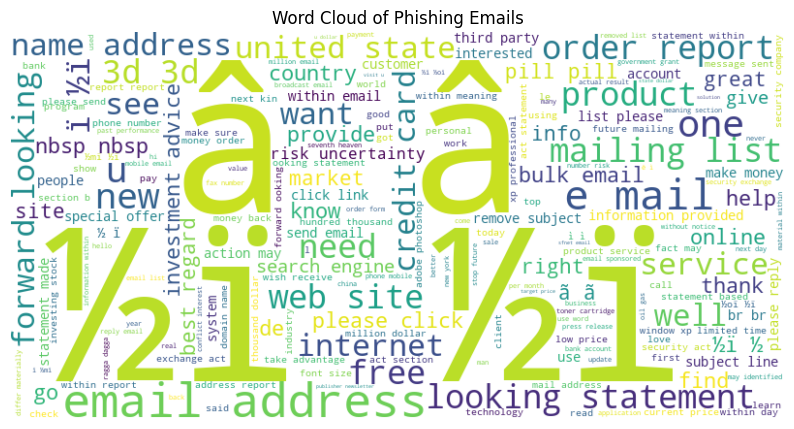

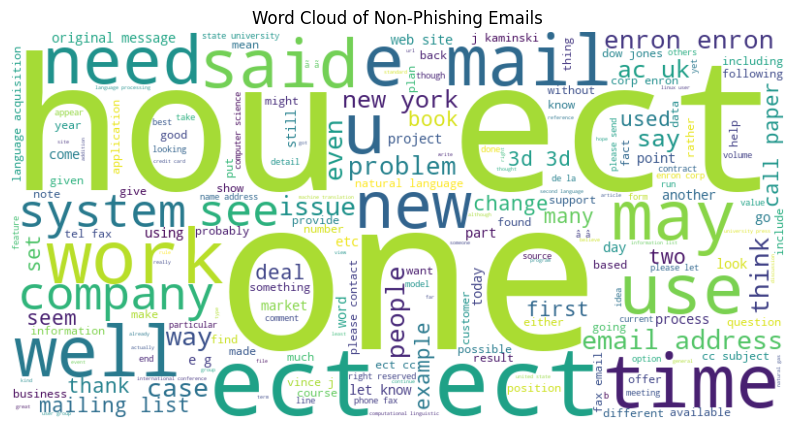

In [6]:
# Split DataFrame into phishing and non-phishing emails
phishing_emails = df_phish[df_phish['Email Type'] == 'Phishing Email']
non_phishing_emails = df_phish[df_phish['Email Type'] == 'Safe Email']

# Concatenate tokenized text from phishing emails into a single string
phishing_text = ' '.join(phishing_emails['Tokenized_Text'].explode().dropna())

# Concatenate tokenized text from non-phishing emails into a single string
non_phishing_text = ' '.join(non_phishing_emails['Tokenized_Text'].explode().dropna())

# Generate word cloud for phishing emails
phishing_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(phishing_text)

# Generate word cloud for non-phishing emails
non_phishing_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_phishing_text)

# Plotting phishing word cloud
plt.figure(figsize=(10, 6))
plt.imshow(phishing_wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Phishing Emails')
plt.axis('off')
plt.show()

# Plotting non-phishing word cloud
plt.figure(figsize=(10, 6))
plt.imshow(non_phishing_wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Non-Phishing Emails')
plt.axis('off')
plt.show()

## Next Up Lexicon Based Sentiment Analysis
Chose this strategy because it is fairly simple and easy to implement. The output is sentiment intensity scores: {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.7906} when using nltk "Sentiment Intensity Analyzer"

In [7]:
import nltk

In [8]:
# Append the NLTK data directory path
nltk.data.path.append("C:\\Users\\danie\\AppData\\Roaming\\nltk_data")
nltk.download('vader_lexicon')
# Now, you can initialize the VADER sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
# Function to calculate sentiment scores for email text
def calculate_sentiment_scores(text):
    # Analyze sentiment
    scores = sid.polarity_scores(text)
    # Return compound sentiment score
    return scores['compound']

# Apply sentiment analysis to each email text in the DataFrame
df_phish['Sentiment_Score'] = df_phish['Email Text'].apply(calculate_sentiment_scores)



In [11]:
df_phish.to_csv("Sentiment_Analysis_Export_df.csv",index=False)